In [1]:
# @title
from IPython.display import display, HTML

display(HTML("""
<script>
const firstCell = document.querySelector('.cell.code_cell');
if (firstCell) {
  firstCell.querySelector('.input').style.pointerEvents = 'none';
  firstCell.querySelector('.input').style.opacity = '0.5';
}
</script>
"""))

html = """
<div style="display:flex; flex-direction:column; align-items:center; text-align:center; gap:12px; padding:8px;">
  <h1 style="margin:0;">👋 Welcome to <span style="color:#1E88E5;">Algopath Coding Academy</span>!</h1>

  <img src="https://raw.githubusercontent.com/sshariqali/mnist_pretrained_model/main/algopath_logo.jpg"
       alt="Algopath Coding Academy Logo"
       width="400"
       style="border-radius:15px; box-shadow:0 4px 12px rgba(0,0,0,0.2); max-width:100%; height:auto;" />

  <p style="font-size:16px; margin:0;">
    <em>Empowering young minds to think creatively, code intelligently, and build the future with AI.</em>
  </p>
</div>
"""

display(HTML(html))

### **1. What Are Transformers and Why They Brought the AI Revolution?**

In 2017, researchers at Google published a groundbreaking paper titled **"Attention Is All You Need"**. They introduced the **Transformer architecture**, which fundamentally changed how we approach sequence processing tasks in AI.

| Innovation | Benefit | Impact |
|-----------|---------|--------|
| **Parallel Processing** | Process all words simultaneously | Training 10-100x faster than RNNs |
| **Attention Mechanism** | Direct connections between any words | Better understanding of context |
| **Scalability** | Works better with more data/parameters | Powers models from millions to trillions of parameters |
| **Transfer Learning** | Pre-train once, adapt to many tasks | Enables ChatGPT, GPT-4, BERT, and more |

The **attention mechanism** is what makes Transformers special. It allows the model to focus on relevant parts of the input when processing each word - just like how you naturally focus on important words when reading!

In this notebook, we'll understand **how attention works** - the fundamental mechanism behind all modern language models. By the end, you'll know exactly how ChatGPT, GPT-4, and other AI systems process and understand language!

<div align="center">
  <img src="https://substackcdn.com/image/fetch/$s_!jtT-!,f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2Ff4d7dc94-6f18-4973-a501-de1d5b101c10_1903x856.png" width="700"/>
</div>

Let's dive in! 🚀

### **2. What is Attention? The Human Perspective**

Before diving into the mathematics, let's understand attention through something you do naturally every day: **paying attention**.

**Example 1: Reading This Sentence**

When you read the sentence: *"The cat, which was fluffy and orange, sat on the mat"*, your brain doesn't process each word in isolation. When you reach the word "sat", you automatically:
- ✅ Remember that "cat" is the subject (even though it's far away)
- ✅ Ignore the descriptive details ("fluffy and orange")
- ✅ Connect "sat" with "cat" for subject-verb agreement
- ✅ Understand "mat" is the location

You **selectively attend** to relevant words while reading!

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/1*7hbg6pGtFgYRakP_GZVF4A.png" width="400"/>
</div>

**Example 2: Listening in a Crowded Room**

Imagine you're at a party with multiple conversations happening. You can:
- 🎯 Focus on your friend's voice (high attention weight)
- 🔇 Tune out background noise (low attention weight)
- 👂 Shift attention when you hear your name elsewhere

This is the **Cocktail Party Effect** – your brain dynamically adjusts attention weights!

**Example 3: Looking at a Photograph**

When shown a photo and asked "Where is the dog?", your eyes:
- 👀 Scan the entire image quickly
- 🎯 Focus intensely on regions with dog-like features
- ⚡ Process all regions in parallel (not sequentially!)

<div align="center">
  <img src="https://i.pinimg.com/736x/fc/e6/a6/fce6a68b9dfcb1de76e1b477294ad0f2.jpg" width="600"/>
</div>

**The Key Insight**

In all these examples, you:
1. Have access to **all information simultaneously** (parallel processing)
2. Assign different **importance weights** to different pieces of information
3. Combine information based on **relevance to your current goal**

This is exactly what **attention mechanisms** do for neural networks!

### **3. The Core Principle: Weighted Information Aggregation**

**From Human Intuition to Mathematical Formulation**

Let's formalize what we just observed. Attention mechanisms compute a weighted sum of values, where the weights represent **how much attention** to pay to each element.

**Simple Example: Computing Average Grade**

Imagine you have three test scores: [85, 90, 95]

**Uniform Attention** (equal weights):
$$\text{Average} = \frac{1}{3}(85) + \frac{1}{3}(90) + \frac{1}{3}(95) = 90$$

**Weighted Attention** (finals count more):
$$\text{Weighted} = 0.2(85) + 0.3(90) + 0.5(95) = 91.5$$

The weights [0.2, 0.3, 0.5] represent **how much attention** to pay to each score!

**Generalizing to Sequences**

For a sequence of words $[w_1, w_2, ..., w_n]$, attention computes:

$$\text{Output}_i = \sum_{j=1}^{n} \alpha_{ij} \cdot \text{value}_j$$

Where:
- $\alpha_{ij}$ = attention weight from word $i$ to word $j$ ("How much should word $i$ attend to word $j$?")
- $\text{value}_j$ = the information content of word $j$
- $\sum_{j=1}^{n} \alpha_{ij} = 1$ (weights sum to 1, like probabilities)

**The Magic: Dynamic Weights**

Unlike RNNs where information flows sequentially, attention weights are:
- ⚡ **Computed dynamically** based on content (not position)
- 🔗 **Connect any two words directly** (no sequential bottleneck)
- 📊 **Different for each word** (context-dependent)
- 🎯 **Learned during training** (optimized for the task)

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/1*1K4x4M_i-JiJAVSqBWIvBQ.png" width="600"/>
</div>

### **4. A Concrete Example: Understanding "The Animal Didn't Cross the Street Because It Was Too Tired"**

Let's see attention in action with a real sentence!

**The Challenge:**

What does "it" refer to in this sentence?

*"The animal didn't cross the street because it was too tired."*

Possible interpretations:
1. "it" = the animal (makes sense! ✅)
2. "it" = the street (doesn't make sense ❌)

**How Attention Solves This:**

When processing the word "it", an attention mechanism:

| Query Token | Word | Attention Weight | Reasoning |
|---|---|---|---|
| it | The | 0.02 | Not relevant to "it" |
| it | **animal** | **0.65** | 🎯 **High attention! Likely referent** |
| it | didn't | 0.01 | Grammar word, not relevant |
| it | cross | 0.03 | Verb, not a noun |
| it | the | 0.01 | Not relevant |
| it | street | 0.15 | Possible but unlikely |
| it | because | 0.01 | Connector word |
| it | it | 0.05 | Self-reference |
| it | was | 0.01 | Grammar word |
| it | too | 0.01 | Modifier |
| it | tired | 0.05 | Adjective, gives context |

**Attention Weight Visualization:**

<div align="center">
  <img src="https://cdn.prod.website-files.com/65c4ab17d1f4702114123723/662b32066c6cfbca695875fd_image-png-Aug-02-2023-02-02-22-8493-PM.png" width="400"/>
</div>

The model learns that:
- Pronouns should attend heavily to nouns
- Semantic compatibility matters (animals get tired, streets don't)
- Recent nouns get more weight (recency bias)

**The Attention Output:**

$$\text{it}_{\text{representation}} = 0.65 \cdot \text{animal} + 0.15 \cdot \text{street} + \text{(small contributions from others)}$$

The representation of "it" is now **strongly influenced by "animal"** – the model has successfully resolved the reference!

### **5. The Intuition Builder: A Simple Analogy**

Let's solidify your understanding with a library analogy:

**🏛️ The Library Analogy**

Imagine you're researching "climate change impacts" in a library:

**Your Query:** "How does climate change affect polar bears?"

**The Library Catalog (Keys):**
- Book 1: "Climate Change Overview" 🔑
- Book 2: "Polar Bear Biology" 🔑
- Book 3: "Arctic Ecosystems" 🔑
- Book 4: "17th Century Poetry" 🔑
- Book 5: "Ocean Acidification" 🔑

**What You Do:**

1. **Compare Query with Keys** (Matching step)
   - Your query ↔ "Climate Change Overview": High relevance! ✅
   - Your query ↔ "Polar Bear Biology": High relevance! ✅
   - Your query ↔ "Arctic Ecosystems": Medium relevance ✓
   - Your query ↔ "17th Century Poetry": No relevance ❌
   - Your query ↔ "Ocean Acidification": Low relevance

2. **Assign Attention Weights** (based on relevance)
   - Book 1: 0.35 (35% attention)
   - Book 2: 0.40 (40% attention) 🎯
   - Book 3: 0.20 (20% attention)
   - Book 4: 0.00 (0% attention)
   - Book 5: 0.05 (5% attention)

3. **Read Content (Values) Proportionally**
   - Spend 40% of your time on "Polar Bear Biology"
   - Spend 35% on "Climate Change Overview"
   - Spend 20% on "Arctic Ecosystems"
   - Skip "17th Century Poetry" entirely
   - Briefly skim "Ocean Acidification"

4. **Synthesize Information** (Weighted aggregation)
   - Your final understanding = 
     - 0.40 × (Polar Bear content) +
     - 0.35 × (Climate content) +
     - 0.20 × (Arctic content) +
     - 0.05 × (Ocean content)

**Mapping to Attention:**

| Library Concept | Attention Mechanism |
|----------------|--------------------|
| Your research question | **Query (Q)** |
| Book titles in catalog | **Keys (K)** |
| Book contents | **Values (V)** |
| Relevance matching | **Q·K (dot product)** |
| Time allocation | **Attention weights (α)** |
| Final understanding | **Output (weighted sum of V)** |

**The Formula Revealed:**

$$\text{Understanding} = \sum_{i} \alpha_i \cdot \text{Book}_i$$

$$\text{where } \alpha_i = \text{softmax}(\frac{\text{Query} \cdot \text{Key}_i}{\sqrt{d}})$$

This is **exactly** how attention mechanisms work!

### **6. Scaled Dot-Product Attention: The Mathematical Heart**

Now let's dive into the actual mechanism! The **scaled dot-product attention** is the fundamental building block of the Transformer architecture.

**The Complete Formula:**

$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

This looks intimidating, but let's break it down step-by-step!

**Step-by-Step Breakdown:**

**Step 1: Compute Similarity Scores (Q·K^T)**

Think of this as "how relevant is each key to each query?"

$$\text{Scores} = QK^T$$

- **Q** (Query): "What am I looking for?" - Shape: $(n, d_k)$
- **K** (Key): "What do I offer?" - Shape: $(n, d_k)$
- **Result**: Similarity matrix - Shape: $(n, n)$

**Intuition:** Dot product measures similarity (like cosine similarity). High dot product = high relevance!

**Example:**
```
Query: "it"  →  [0.2, 0.8, 0.3]
Key: "animal"  →  [0.3, 0.9, 0.2]
Similarity = 0.2×0.3 + 0.8×0.9 + 0.3×0.2 = 0.84 (High! ✅)

Query: "it"  →  [0.2, 0.8, 0.3]
Key: "street"  →  [0.7, 0.1, 0.5]
Similarity = 0.2×0.7 + 0.8×0.1 + 0.3×0.5 = 0.37 (Low ❌)
```

**Step 2: Scale by √d_k**

$$\text{Scaled Scores} = \frac{QK^T}{\sqrt{d_k}}$$

**Why scaling?** This is CRUCIAL! Let's see why:

**Problem Without Scaling:**

As the dimension $d_k$ increases, dot products grow larger in magnitude:

| Dimension | Example Dot Product | Softmax Behavior |
|-----------|-------------------|------------------|
| $d_k = 2$ | 0.84 | Soft distribution ✅ |
| $d_k = 64$ | 15.2 | Starts peaking 😐 |
| $d_k = 512$ | 45.8 | **Extremely peaked** 🚨 |

When dot products are too large, softmax pushes almost all probability to one element:

```python
# Without scaling (d_k = 512)
scores = [45.8, 12.3, 8.1]
softmax(scores) = [0.9999, 0.0001, 0.0000]  # Almost one-hot! 🚨

# With scaling (divide by √512 ≈ 22.6)
scaled = [2.03, 0.54, 0.36]
softmax(scaled) = [0.65, 0.20, 0.15]  # Nice distribution! ✅
```

**The Math Behind It:**

For a $d_k$-dimensional random vector with unit variance, the dot product has variance $d_k$. Dividing by $\sqrt{d_k}$ normalizes the variance back to 1:

$$\text{Var}(QK^T) = d_k \implies \text{Var}\left(\frac{QK^T}{\sqrt{d_k}}\right) = 1$$

This keeps gradients healthy and prevents **vanishing gradients** during training!

**Step 3: Apply Softmax**

$$\text{Attention Weights} = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)$$

Softmax converts scores to probabilities (all positive, sum to 1):

$$\alpha_{ij} = \frac{\exp(s_{ij})}{\sum_{k=1}^{n} \exp(s_{ik})}$$

**Properties:**
- ✅ All weights between 0 and 1
- ✅ Sum of weights = 1 (like probabilities)
- ✅ Differentiable (enables backpropagation)
- ✅ "Soft" selection (vs hard argmax)

**Step 4: Weighted Sum of Values**

$$\text{Output} = \text{Attention Weights} \times V$$

Finally, we aggregate the values using our computed attention weights:

$$\text{Output}_i = \sum_{j=1}^{n} \alpha_{ij} \cdot V_j$$

- **V** (Value): "What information do I provide?" - Shape: $(n, d_v)$
- **Output**: Contextualized representation - Shape: $(n, d_v)$

**The Complete Picture:**

<div align="center">
  <img src="https://velog.velcdn.com/images%2Fcha-suyeon%2Fpost%2Fba830026-6d8f-4e77-b288-f75dd3a51457%2Fimage.png" width="600"/>
</div>

Let's implement scaled dot-product attention in PyTorch to truly understand what's happening!

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def scaled_dot_product_attention_pytorch(Q, K, V, mask=None):
    """
    Scaled Dot-Product Attention (PyTorch version with batching)
    
    Args:
        Q: Query tensor (batch_size, seq_len, d_k)
        K: Key tensor (batch_size, seq_len, d_k)
        V: Value tensor (batch_size, seq_len, d_v)
        mask: Optional mask (batch_size, seq_len, seq_len) or (seq_len, seq_len)
    
    Returns:
        output: Attention output (batch_size, seq_len, d_v)
        attention_weights: Attention weights (batch_size, seq_len, seq_len)
    """
    # Get dimension for scaling
    d_k = Q.size(-1)
    
    # Step 1 & 2: Compute scaled scores
    # Q: (batch, seq_len, d_k)
    # K.transpose: (batch, d_k, seq_len)
    # scores: (batch, seq_len, seq_len)
    scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))
    
    # Step 3: Apply mask (if provided)
    if mask is not None:
        scores = scores.masked_fill(mask == 0, -1e9)
    
    # Step 4: Apply softmax
    attention_weights = F.softmax(scores, dim=-1)
    
    # Step 5: Weighted sum of values
    output = torch.matmul(attention_weights, V)
    
    return output, attention_weights

batch_size = 2
seq_len = 5
d_k = 8
d_v = 8

# Create random Q, K, V for a batch
torch.manual_seed(42)
Q = torch.randn(batch_size, seq_len, d_k)
K = torch.randn(batch_size, seq_len, d_k)
V = torch.randn(batch_size, seq_len, d_v)

print(f"Input shapes:")
print(f"Q: {Q.shape} (batch_size, seq_len, d_k)")
print(f"K: {K.shape}")
print(f"V: {V.shape}")
print()

# Compute attention
output, attention_weights = scaled_dot_product_attention_pytorch(Q, K, V)

print(f"Output shapes:")
print(f"Output: {output.shape} (batch_size, seq_len, d_v)")
print(f"Attention weights: {attention_weights.shape} (batch_size, seq_len, seq_len)")
print()

print(f"Attention weights for first sample:")
print(attention_weights[0].detach().numpy())
print()
print(f"Row sums (should be ~1.0): {attention_weights[0].sum(dim=1).detach().numpy()}")

Input shapes:
Q: torch.Size([2, 5, 8]) (batch_size, seq_len, d_k)
K: torch.Size([2, 5, 8])
V: torch.Size([2, 5, 8])

Output shapes:
Output: torch.Size([2, 5, 8]) (batch_size, seq_len, d_v)
Attention weights: torch.Size([2, 5, 5]) (batch_size, seq_len, seq_len)

Attention weights for first sample:
[[0.28146186 0.15954717 0.12936968 0.3631083  0.06651296]
 [0.15785933 0.1584495  0.2352516  0.19352666 0.25491288]
 [0.21553867 0.5677449  0.02604535 0.12558281 0.06508833]
 [0.10259555 0.33029744 0.08689712 0.33243936 0.14777048]
 [0.10312181 0.13046686 0.38471398 0.09487153 0.2868258 ]]

Row sums (should be ~1.0): [1.         1.         1.         0.99999994 1.        ]


**Visualizing Batch Attention:**

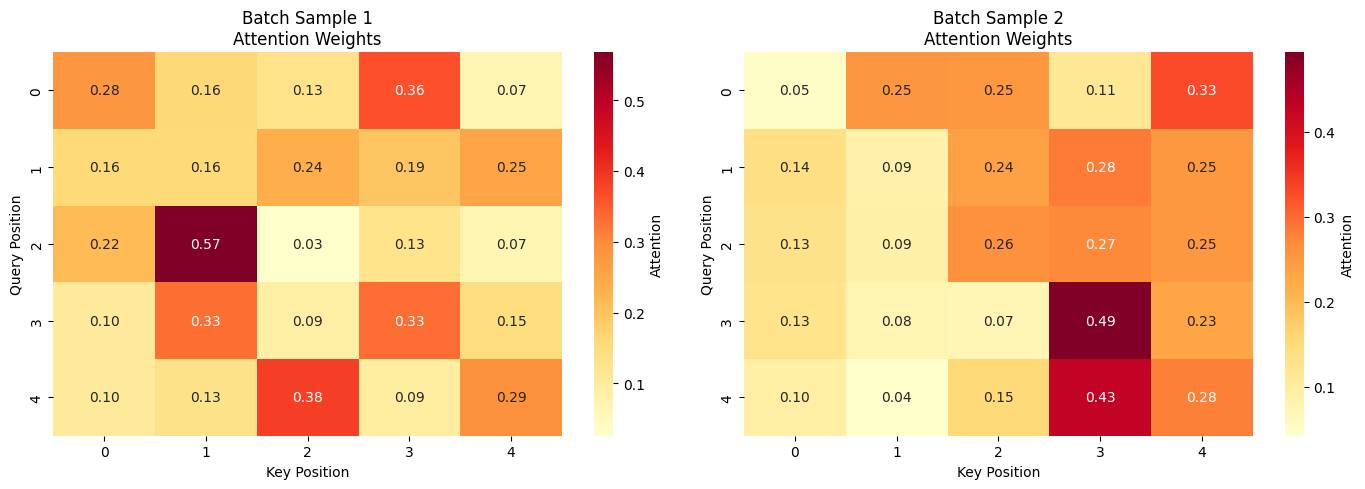

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize attention for both samples in the batch
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx in range(2):
    sns.heatmap(attention_weights[idx].detach().numpy(),
                annot=True,
                fmt='.2f',
                cmap='YlOrRd',
                ax=axes[idx],
                cbar_kws={'label': 'Attention'})
    axes[idx].set_title(f'Batch Sample {idx+1}\nAttention Weights')
    axes[idx].set_xlabel('Key Position')
    axes[idx].set_ylabel('Query Position')

plt.tight_layout()
plt.show()

### **7. Multi-Head Attention: Multiple Perspectives**

**The "Why Multiple Perspectives?" Analogy**

Imagine you're analyzing a movie review:

*"The cinematography was breathtaking, but the plot felt rushed and the acting was mediocre."*

**Different Experts Analyzing the Same Text:**

| Expert | Focus | What They Notice |
|--------|-------|-----------------|
| **Syntax Expert** | Grammar structure | Subject-verb relationships, conjunctions |
| **Sentiment Expert** | Emotional tone | "breathtaking" (positive), "rushed" (negative) |
| **Entity Expert** | Key concepts | "cinematography", "plot", "acting" |
| **Dependency Expert** | Long-range links | "but" connects contrasting ideas |

Each expert looks at the SAME text but focuses on DIFFERENT patterns!

This is exactly what **Multi-Head Attention** does – it runs multiple attention mechanisms in parallel, each learning to focus on different aspects of the input.

**The Key Insight:**

Instead of having one attention mechanism with large dimensions, we split it into multiple smaller "heads":

- **Single-Head:** One 512-dimensional attention ⚠️
- **Multi-Head (8 heads):** Eight 64-dimensional attentions ✅

Each head can learn a different attention pattern:
- 🎯 Head 1: Syntactic dependencies (subject-verb)
- 🎯 Head 2: Semantic relationships (similar words)
- 🎯 Head 3: Positional patterns (adjacent words)
- 🎯 Head 4: Long-range dependencies
- ... and so on

<div align="center">
  <img src="https://velog.velcdn.com/images/jhyunee/post/c48e0195-6443-4156-bccd-844599d7c9d2/image.png" width="600"/>
</div>

**Mathematical Formulation:**

$$\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, \text{head}_2, ..., \text{head}_h)W^O$$

Where each head is:

$$\text{head}_i = \text{Attention}(QW_i^Q, KW_i^K, VW_i^V)$$

**Breaking Down the Process:**

1. **Project**: Each head gets its own projection matrices $W^Q_i, W^K_i, W^V_i$
2. **Attend**: Each head computes attention independently
3. **Concatenate**: Combine all head outputs
4. **Project Again**: Final linear transformation $W^O$

**Dimensions Flow:**

```
Input: (batch, seq_len, d_model=512)
   ↓
For each of h=8 heads:
   ↓ Project to d_k = d_model/h = 64
   Q, K, V: (batch, seq_len, 64)
   ↓ Attention
   head_i: (batch, seq_len, 64)
   ↓
Concatenate all 8 heads:
   ↓
(batch, seq_len, 8×64=512)
   ↓ Final projection W^O
(batch, seq_len, d_model=512)
```

**Why This Works:**

- ✅ **Representational diversity**: Different heads capture different patterns
- ✅ **Parallel computation**: All heads run simultaneously (GPU efficient!)
- ✅ **Same computational cost**: 8 heads × 64 dims ≈ 1 head × 512 dims
- ✅ **Redundancy**: If one head fails to learn, others can compensate
- ✅ **Interpretability**: Can visualize what each head learned


### **8. Implementing Multi-Head Attention**

Let's build a complete Multi-Head Attention module as an `nn.Module`!

In [4]:
class MultiHeadAttention(nn.Module):
    """
    Multi-Head Attention mechanism
    
    Args:
        d_model: Total dimension of the model (e.g., 512)
        num_heads: Number of attention heads (e.g., 8)
        dropout: Dropout probability (default: 0.1)
    """
    def __init__(self, d_model, num_heads, dropout=0.1):
        super(MultiHeadAttention, self).__init__()
        
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads  # Dimension per head
        
        # Linear projections for Q, K, V (one for each)
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        
        # Output projection
        self.W_o = nn.Linear(d_model, d_model)
        
        # Dropout
        self.dropout = nn.Dropout(dropout)
        
        # For visualization
        self.attention_weights = None
        
    def split_heads(self, x):
        """
        Split the last dimension into (num_heads, d_k)
        
        Args:
            x: (batch_size, seq_len, d_model)
        Returns:
            (batch_size, num_heads, seq_len, d_k)
        """
        batch_size, seq_len, d_model = x.size()
        # Reshape to (batch_size, seq_len, num_heads, d_k)
        x = x.view(batch_size, seq_len, self.num_heads, self.d_k)
        # Transpose to (batch_size, num_heads, seq_len, d_k)
        return x.transpose(1, 2)
    
    def combine_heads(self, x):
        """
        Inverse of split_heads
        
        Args:
            x: (batch_size, num_heads, seq_len, d_k)
        Returns:
            (batch_size, seq_len, d_model)
        """
        batch_size, num_heads, seq_len, d_k = x.size()
        # Transpose to (batch_size, seq_len, num_heads, d_k)
        x = x.transpose(1, 2).contiguous()
        # Reshape to (batch_size, seq_len, d_model)
        return x.view(batch_size, seq_len, self.d_model)
    
    def forward(self, Q, K, V, mask=None):
        """
        Forward pass
        
        Args:
            Q: Query tensor (batch_size, seq_len, d_model)
            K: Key tensor (batch_size, seq_len, d_model)
            V: Value tensor (batch_size, seq_len, d_model)
            mask: Optional mask (batch_size, 1, seq_len, seq_len)
        
        Returns:
            output: (batch_size, seq_len, d_model)
        """
        batch_size = Q.size(0)
        
        # 1. Linear projections
        Q = self.W_q(Q)  # (batch_size, seq_len, d_model)
        K = self.W_k(K)
        V = self.W_v(V)
        
        # 2. Split into multiple heads
        Q = self.split_heads(Q)  # (batch_size, num_heads, seq_len, d_k)
        K = self.split_heads(K)
        V = self.split_heads(V)
        
        # 3. Scaled dot-product attention for all heads in parallel
        # Compute attention scores
        scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.d_k, dtype=torch.float32))
        # (batch_size, num_heads, seq_len, seq_len)
        
        # Apply mask if provided
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)
        
        # Apply softmax
        attention_weights = F.softmax(scores, dim=-1)
        attention_weights = self.dropout(attention_weights)
        
        # Store for visualization
        self.attention_weights = attention_weights.detach()
        
        # Apply attention to values
        attention_output = torch.matmul(attention_weights, V)
        # (batch_size, num_heads, seq_len, d_k)
        
        # 4. Concatenate heads
        attention_output = self.combine_heads(attention_output)
        # (batch_size, seq_len, d_model)
        
        # 5. Final linear projection
        output = self.W_o(attention_output)
        
        return output

# Test the MultiHeadAttention module
print("="*60)
print("MULTI-HEAD ATTENTION TEST")
print("="*60)
print()

d_model = 512
num_heads = 8
batch_size = 2
seq_len = 10

# Create module
mha = MultiHeadAttention(d_model, num_heads)

# Create random input
torch.manual_seed(42)
x = torch.randn(batch_size, seq_len, d_model)

# Forward pass (self-attention: Q=K=V)
output = mha(x, x, x)

print(f"Input shape: {x.shape}")
print(f"Output shape: {output.shape}")
print(f"Number of parameters: {sum(p.numel() for p in mha.parameters()):,}")
print()

print(f"Architecture details:")
print(f"- Model dimension (d_model): {d_model}")
print(f"- Number of heads: {num_heads}")
print(f"- Dimension per head (d_k): {d_model // num_heads}")
print(f"- Attention weights shape: {mha.attention_weights.shape}")
print(f"  (batch_size, num_heads, seq_len, seq_len)")

MULTI-HEAD ATTENTION TEST

Input shape: torch.Size([2, 10, 512])
Output shape: torch.Size([2, 10, 512])
Number of parameters: 1,050,624

Architecture details:
- Model dimension (d_model): 512
- Number of heads: 8
- Dimension per head (d_k): 64
- Attention weights shape: torch.Size([2, 8, 10, 10])
  (batch_size, num_heads, seq_len, seq_len)


### **9. Visualizing Different Head Patterns**

Let's visualize what different attention heads learn to focus on!

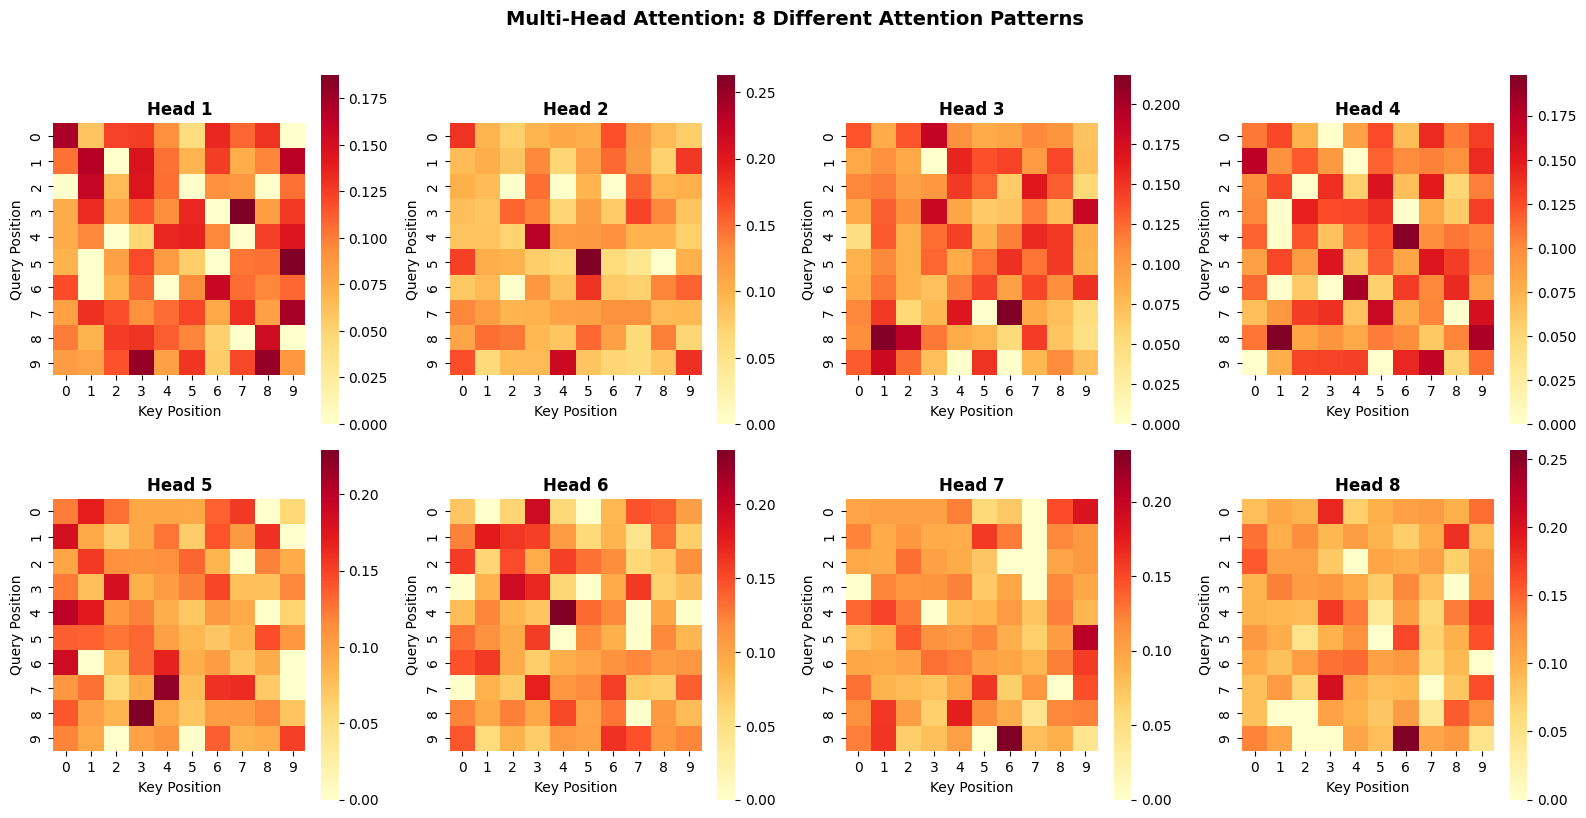


🔍 Observation:
Each head learns DIFFERENT attention patterns!
- Some heads might focus on local patterns (diagonal)
- Some heads might focus on specific positions
- Some heads might have diffuse attention (uniform)

This diversity allows the model to capture multiple relationships simultaneously!


In [5]:
# Visualize attention patterns from different heads
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

# Get attention weights for first sample in batch
attention = mha.attention_weights[0]  # (num_heads, seq_len, seq_len)

for head in range(num_heads):
    ax = axes[head]
    sns.heatmap(attention[head].numpy(),
                cmap='YlOrRd',
                ax=ax,
                cbar=True,
                square=True)
    ax.set_title(f'Head {head+1}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Key Position')
    ax.set_ylabel('Query Position')

plt.suptitle('Multi-Head Attention: 8 Different Attention Patterns', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n🔍 Observation:")
print("Each head learns DIFFERENT attention patterns!")
print("- Some heads might focus on local patterns (diagonal)")
print("- Some heads might focus on specific positions")
print("- Some heads might have diffuse attention (uniform)")
print("\nThis diversity allows the model to capture multiple relationships simultaneously!")

### **10. Attention Masking Strategies: Controlling Information Flow**

Masking is CRITICAL for making attention mechanisms work correctly in real applications. Let's understand why and how!

**Why Do We Need Masking?**

Consider two fundamental problems:

**Problem 1: Padding Tokens 🚫**

When batching sequences of different lengths, we pad shorter sequences:

```
Sentence 1: "I love AI" (3 tokens)
Sentence 2: "Deep learning is amazing" (4 tokens)

Padded batch:
["I", "love", "AI", <PAD>]
["Deep", "learning", "is", "amazing"]
```

**Issue:** We don't want attention to focus on meaningless `<PAD>` tokens!

**Problem 2: Future Information Leakage 🔮**

When training language models to predict the next word:

```
Input: "The cat sat on the"
Target: "mat"
```

During training, if position 3 ("sat") can attend to position 6 ("mat"), the model **cheats** by seeing future words it shouldn't know yet!

**Solution:** Attention masking! 🎭

### **11. Padding Mask: Ignoring Padded Tokens**

**The Padding Mask Strategy:**

For padded positions, set attention scores to $-\infty$ (or a very large negative number like $-10^9$) BEFORE applying softmax:

$$\text{scores}_{\text{masked}} = \begin{cases} 
\text{score}_{ij} & \text{if position } j \text{ is not padded} \\
-\infty & \text{if position } j \text{ is padded}
\end{cases}$$

After softmax: $\text{softmax}(-\infty) = 0$ ✅

**Visualization:**

```
Original sequence: ["I", "love", "AI", <PAD>]
                     1     1     1     0     ← Mask (1=real, 0=pad)

Attention scores before masking:
          I    love   AI    <PAD>
    I   [0.5   0.3   0.2    0.4]
  love  [0.1   0.6   0.1    0.2]
   AI   [0.3   0.2   0.4    0.3]
  <PAD> [0.2   0.3   0.2    0.5]

After masking <PAD> column:
          I    love   AI    <PAD>
    I   [0.5   0.3   0.2    -∞]
  love  [0.1   0.6   0.1    -∞]
   AI   [0.3   0.2   0.4    -∞]
  <PAD> [0.2   0.3   0.2    -∞]

After softmax (normalized excluding <PAD>):
          I    love   AI    <PAD>
    I   [0.50  0.30  0.20   0.00] ✅
  love  [0.12  0.75  0.12   0.00] ✅
   AI   [0.33  0.22  0.44   0.00] ✅
  <PAD> [0.33  0.41  0.27   0.00] ✅
```

**Key Point:** The padded positions receive ZERO attention weight!

PADDING MASK DEMONSTRATION

Input sequences (0 = <PAD>):
tensor([[5, 8, 3, 2, 0, 0]])

Padding mask shape: torch.Size([1, 1, 1, 6])
Padding mask (1=real, 0=pad):
tensor([1., 1., 1., 1., 0., 0.])



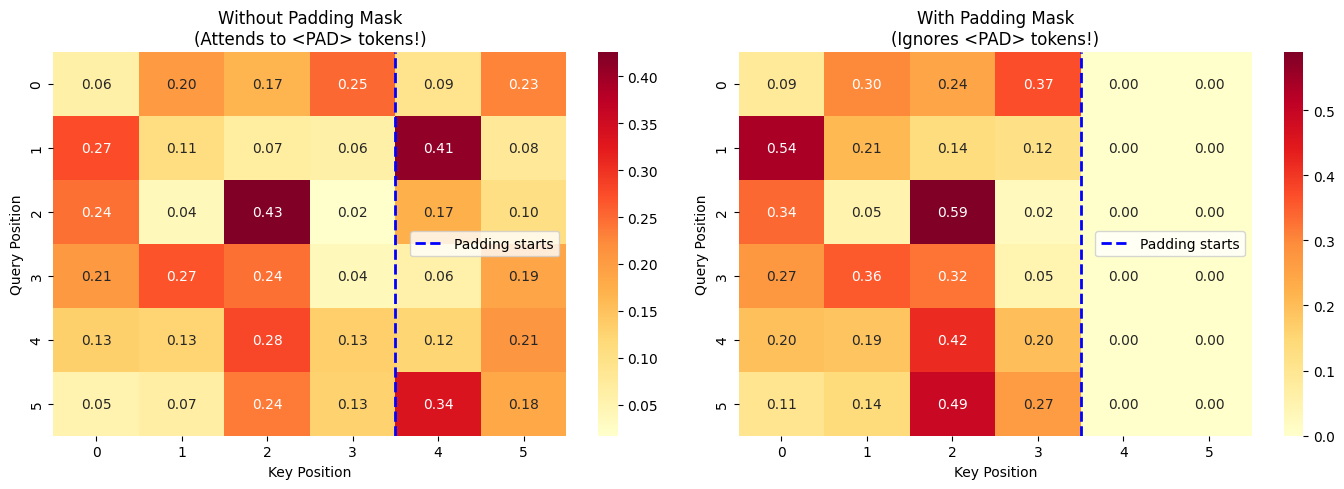


✅ Notice: With padding mask, columns 5-6 (padded positions) have ZERO attention!


In [19]:
def create_padding_mask(seq, pad_token=0):
    """
    Create padding mask
    
    Args:
        seq: Input sequence (batch_size, seq_len)
        pad_token: Token id used for padding
    
    Returns:
        mask: Padding mask (batch_size, 1, 1, seq_len)
    """
    # Create mask: 1 for real tokens, 0 for padding
    mask = (seq != pad_token).unsqueeze(1).unsqueeze(2)
    return mask.float()

# Example: Batch with padding
print("="*60)
print("PADDING MASK DEMONSTRATION")
print("="*60)
print()

# Create a batch where sequences have different lengths
# 0 represents <PAD> token
sequences = torch.tensor([
    [5, 8, 3, 2, 0, 0],  # Length 4 (2 pads)
    # [7, 4, 9, 1, 6, 2],  # Length 6 (0 pads)
    # [3, 8, 0, 0, 0, 0],  # Length 2 (4 pads)
])

print("Input sequences (0 = <PAD>):")
print(sequences)
print()

# Create padding mask
pad_mask = create_padding_mask(sequences, pad_token=0)
print(f"Padding mask shape: {pad_mask.shape}")
print("Padding mask (1=real, 0=pad):")
print(pad_mask.squeeze())
print()

# Create dummy Q, K, V for demonstration
batch_size, seq_len = sequences.shape
d_model = 8
Q = torch.randn(batch_size, seq_len, d_model)
K = torch.randn(batch_size, seq_len, d_model)
V = torch.randn(batch_size, seq_len, d_model)

# Compute attention WITHOUT mask
output_no_mask, attn_no_mask = scaled_dot_product_attention_pytorch(Q, K, V, mask=None)

# Compute attention WITH padding mask
pad_mask_3d = pad_mask.squeeze(1)
output_with_mask, attn_with_mask = scaled_dot_product_attention_pytorch(Q, K, V, mask=pad_mask_3d)

# Visualize the difference
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Without mask
sns.heatmap(attn_no_mask[0].detach().numpy(),
            annot=True, fmt='.2f', cmap='YlOrRd',
            ax=axes[0])
axes[0].set_title('Without Padding Mask\n(Attends to <PAD> tokens!)')
axes[0].set_xlabel('Key Position')
axes[0].set_ylabel('Query Position')

# With mask
sns.heatmap(attn_with_mask[0].detach().numpy(),
            annot=True, fmt='.2f', cmap='YlOrRd',
            ax=axes[1])
axes[1].set_title('With Padding Mask\n(Ignores <PAD> tokens!)')
axes[1].set_xlabel('Key Position')
axes[1].set_ylabel('Query Position')

# Mark padded positions
for ax in axes:
    ax.axvline(x=4, color='blue', linewidth=2, linestyle='--', label='Padding starts')
    ax.legend()

plt.tight_layout()
plt.show()

print("\n✅ Notice: With padding mask, columns 5-6 (padded positions) have ZERO attention!")

### **12. Causal/Look-Ahead Mask: Preventing Future Information Leakage**

**The Look-Ahead Problem:**

When training autoregressive models (like GPT), the model predicts the next token based ONLY on previous tokens:

```
Training sequence: "The cat sat on the mat"

Predicting position 3 ("sat"):
✅ Can see: "The", "cat"
❌ Cannot see: "sat", "on", "the", "mat" (these are in the future!)
```

**Why This Matters:**

Without masking, during training:
- The model would see the answer before predicting it (cheating! 🚫)
- At test time, it won't have access to future tokens
- This mismatch causes poor generalization

**The Causal Mask:**

A causal mask is a **lower triangular matrix** that only allows attention to previous positions:

$$\text{Mask} = \begin{bmatrix}
1 & 0 & 0 & 0 \\
1 & 1 & 0 & 0 \\
1 & 1 & 1 & 0 \\
1 & 1 & 1 & 1
\end{bmatrix}$$

**Interpretation:**
- Row 1 (position 1): Can only attend to position 1 (itself)
- Row 2 (position 2): Can attend to positions 1-2
- Row 3 (position 3): Can attend to positions 1-3
- Row 4 (position 4): Can attend to positions 1-4

**Visual Example:**

```
Sequence: ["The", "cat", "sat", "on"]

Without causal mask (WRONG ❌):
        The  cat  sat  on
  The   ✓    ✓    ✓    ✓   ← Can see everything!
  cat   ✓    ✓    ✓    ✓
  sat   ✓    ✓    ✓    ✓
  on    ✓    ✓    ✓    ✓

With causal mask (CORRECT ✅):
        The  cat  sat  on
  The   ✓    ✗    ✗    ✗   ← Only sees itself
  cat   ✓    ✓    ✗    ✗   ← Sees The, cat
  sat   ✓    ✓    ✓    ✗   ← Sees The, cat, sat
  on    ✓    ✓    ✓    ✓   ← Sees all previous
```

**Implementation:**

CAUSAL MASK DEMONSTRATION

Causal mask shape: torch.Size([1, 1, 6, 6])

Causal mask (1=can attend, 0=cannot attend):
[[1 0 0 0 0 0]
 [1 1 0 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 1 0 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 1]]



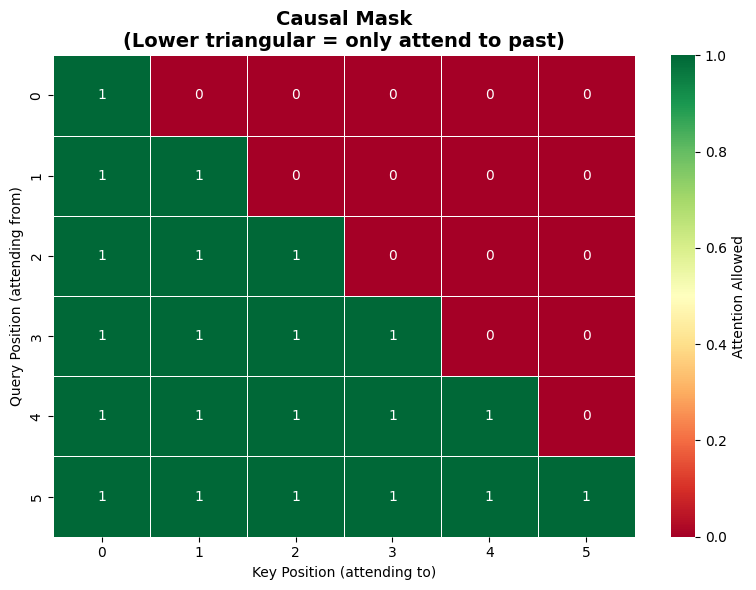

Interpretation:
- Position 0 can only attend to position 0
- Position 1 can attend to positions 0-1
- Position 2 can attend to positions 0-2
- And so on...

✅ This prevents the model from 'cheating' by seeing future tokens!


In [20]:
def create_causal_mask(seq_len):
    """
    Create causal (look-ahead) mask
    
    Args:
        seq_len: Sequence length
    
    Returns:
        mask: Lower triangular mask (1, 1, seq_len, seq_len)
    """
    # Create lower triangular matrix
    mask = torch.tril(torch.ones(seq_len, seq_len))
    return mask.unsqueeze(0).unsqueeze(0)

print("="*60)
print("CAUSAL MASK DEMONSTRATION")
print("="*60)
print()

seq_len = 6
causal_mask = create_causal_mask(seq_len)

print(f"Causal mask shape: {causal_mask.shape}")
print("\nCausal mask (1=can attend, 0=cannot attend):")
print(causal_mask.squeeze().numpy().astype(int))
print()

# Visualize the causal mask
plt.figure(figsize=(8, 6))
sns.heatmap(causal_mask.squeeze().numpy(),
            annot=True,
            fmt='.0f',
            cmap='RdYlGn',
            cbar_kws={'label': 'Attention Allowed'},
            linewidths=0.5)
plt.title('Causal Mask\n(Lower triangular = only attend to past)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Key Position (attending to)')
plt.ylabel('Query Position (attending from)')
plt.tight_layout()
plt.show()

print("Interpretation:")
print("- Position 0 can only attend to position 0")
print("- Position 1 can attend to positions 0-1")
print("- Position 2 can attend to positions 0-2")
print("- And so on...")
print("\n✅ This prevents the model from 'cheating' by seeing future tokens!")

**Comparing Attention With and Without Causal Mask:**

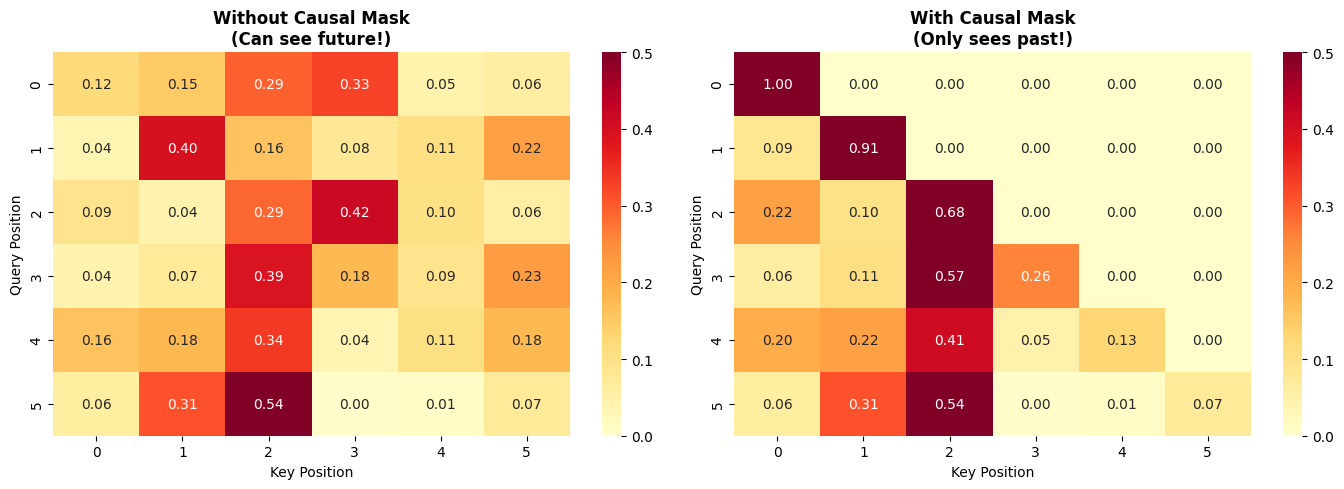


🔍 Key Observations:
1. WITHOUT mask: Upper triangle has non-zero values (attending to future)
2. WITH mask: Upper triangle is all zeros (cannot attend to future)
3. The attention is properly 'causal' - only looking backward in time


In [21]:
# Create dummy Q, K, V
batch_size = 1
d_model = 8

Q = torch.randn(batch_size, seq_len, d_model)
K = torch.randn(batch_size, seq_len, d_model)
V = torch.randn(batch_size, seq_len, d_model)

# Without causal mask
output_no_mask, attn_no_mask = scaled_dot_product_attention_pytorch(Q, K, V, mask=None)

# With causal mask
output_with_mask, attn_with_mask = scaled_dot_product_attention_pytorch(Q, K, V, mask=causal_mask)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Without mask
sns.heatmap(attn_no_mask[0].detach().numpy().squeeze(),
            annot=True, fmt='.2f', cmap='YlOrRd',
            ax=axes[0], vmin=0, vmax=0.5)
axes[0].set_title('Without Causal Mask\n(Can see future!)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Key Position')
axes[0].set_ylabel('Query Position')

# With causal mask
sns.heatmap(attn_with_mask[0].detach().numpy().squeeze(),
            annot=True, fmt='.2f', cmap='YlOrRd',
            ax=axes[1], vmin=0, vmax=0.5)
axes[1].set_title('With Causal Mask\n(Only sees past!)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Key Position')
axes[1].set_ylabel('Query Position')

plt.tight_layout()
plt.show()

print("\n🔍 Key Observations:")
print("1. WITHOUT mask: Upper triangle has non-zero values (attending to future)")
print("2. WITH mask: Upper triangle is all zeros (cannot attend to future)")
print("3. The attention is properly 'causal' - only looking backward in time")

### **13. Self-Attention vs Cross-Attention: Clarifying Key Terms**

You'll frequently encounter terms like **Self-Attention** and **Cross-Attention** in papers and documentation. Let's demystify these concepts once and for all!

**The Key Distinction: Where Do Q, K, V Come From?**

Remember that attention computes:
$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

The **type of attention** depends on the **source of these matrices**!

---

**Self-Attention: Looking Within Yourself**

**Definition:** Self-attention is when Query (Q), Key (K), and Value (V) all come from the **same sequence**.

**Mathematical Formulation:**
$$Q = XW^Q, \quad K = XW^K, \quad V = XW^V$$

Where $X$ is the **same input sequence** for all three!

**The Intuition:**

Imagine you're reading a sentence and trying to understand each word by looking at **other words in the same sentence**:

*"The animal didn't cross the street because it was too tired."*

When processing "it":
- **Query**: "What does 'it' refer to?" (from the word "it")
- **Keys**: "What nouns are available?" (from ALL words in the sentence)
- **Values**: "What information do those nouns provide?" (from ALL words)

All three come from the **same sentence**!

**Visual Example:**

```
Input sentence: ["The", "cat", "sat", "on", "mat"]
                    ↓      ↓      ↓     ↓     ↓
All words attend to each other within the same sequence

"cat" looks at: ["The", "cat", "sat", "on", "mat"]
"sat" looks at: ["The", "cat", "sat", "on", "mat"]
"mat" looks at: ["The", "cat", "sat", "on", "mat"]
```

**Where It's Used:**

| Model | Where | Purpose |
|-------|-------|---------|
| **GPT** | Every layer | Each token attends to previous tokens in the sequence |
| **BERT** | Every layer | Each token attends to all tokens (bidirectional) |
| **Vision Transformer** | Every layer | Each image patch attends to all other patches |
| **Encoder** | All layers | Process input by relating elements to each other |
| **Decoder** | Masked self-attention layers | Generate output by attending to previous outputs |

**Code Example:**
```python
# Self-attention: Q, K, V from the same source
x = torch.randn(batch_size, seq_len, d_model)  # Single input sequence

Q = x @ W_q  # Query from x
K = x @ W_k  # Key from x
V = x @ W_v  # Value from x

# All three come from the same x!
output = attention(Q, K, V)
```

**Real-World Analogy:**

Self-attention is like **proofreading your own essay**:
- You read your own words (Query)
- You check against your own words (Keys)
- You understand from your own words (Values)
- Everything comes from **your essay alone**!

---

**Cross-Attention: Looking at Something Else**

**Definition:** Cross-attention is when Query (Q) comes from **one sequence**, but Key (K) and Value (V) come from a **different sequence**.

**Mathematical Formulation:**
$$Q = X_{\text{target}}W^Q, \quad K = X_{\text{source}}W^K, \quad V = X_{\text{source}}W^V$$

Where $X_{\text{target}}$ and $X_{\text{source}}$ are **different sequences**!

**The Intuition:**

Imagine you're **translating** a sentence:

- **Source (English)**: "The cat sat on the mat"
- **Target (French)**: "Le chat s'est assis sur le tapis"

When generating the French word "chat" (cat):
- **Query**: "What am I generating?" (from French output so far: "Le")
- **Keys**: "What's available in the input?" (from English: "The", "cat", "sat", ...)
- **Values**: "What information does the input provide?" (from English words)

The Query comes from **French** (target), but Keys and Values come from **English** (source)!

**Visual Example:**

```
Source sequence (English): ["The", "cat", "sat", "on", "mat"]
                               ↓      ↓      ↓     ↓     ↓
                            Keys & Values
                                    ↑
                               Cross-Attend
                                    ↑
Target sequence (French):  ["Le", "chat", "?", ...]
                                          ↑
                                       Query
```

**Where It's Used:**

| Model | Where | Purpose |
|-------|-------|---------|
| **Encoder-Decoder Translation** | Decoder cross-attention | Target language attends to source language |
| **Image Captioning** | Decoder | Text attends to image features |
| **Visual Question Answering** | Various layers | Text attends to image regions |
| **Multimodal Models** | Fusion layers | One modality attends to another |
| **Text-to-Image (DALL-E)** | Image decoder | Image tokens attend to text description |

**Code Example:**
```python
# Cross-attention: Q from one source, K & V from another
encoder_output = torch.randn(batch_size, src_len, d_model)  # Source sequence
decoder_hidden = torch.randn(batch_size, tgt_len, d_model)  # Target sequence

Q = decoder_hidden @ W_q      # Query from TARGET
K = encoder_output @ W_k      # Key from SOURCE
V = encoder_output @ W_v      # Value from SOURCE

# Q from target, K & V from source!
output = attention(Q, K, V)
```

**Real-World Analogy:**

Cross-attention is like **translating from a textbook**:
- You're writing in French (Query - what you're generating)
- You're reading from an English book (Keys & Values - source information)
- You look up English words to write French words
- Two different sources!

---

**Side-by-Side Comparison**

| Aspect | Self-Attention | Cross-Attention |
|--------|----------------|-----------------|
| **Q source** | Same sequence | Target sequence |
| **K source** | Same sequence | Source sequence |
| **V source** | Same sequence | Source sequence |
| **Purpose** | Relate elements within a sequence | Relate elements across sequences |
| **Example** | Understanding word relationships in a sentence | Translating from English to French |
| **Sequence lengths** | Q, K, V have same length | Q length ≠ K/V length |
| **Use case** | GPT, BERT, ViT (single input) | Translation, image captioning (two inputs) |
| **Attention matrix shape** | $(seq\_len, seq\_len)$ | $(target\_len, source\_len)$ |

---

**Complete Example: Translation Model**

Let's see how both types work together in a **Transformer translation model**:

```
English: "The cat sat"  →  French: "Le chat s'est assis"

┌─────────────────────────────────────────┐
│          ENCODER (English)              │
│                                         │
│  Input: ["The", "cat", "sat"]          │
│     ↓                                   │
│  Self-Attention (within English)        │
│  - "cat" attends to "The", "cat", "sat"│
│     ↓                                   │
│  Encoder Output                         │
└─────────────────────────────────────────┘
                  ↓
        Keys & Values (K, V)
                  ↓
┌─────────────────────────────────────────┐
│          DECODER (French)               │
│                                         │
│  Output so far: ["Le", "chat"]         │
│     ↓                                   │
│  1. Self-Attention (within French)      │
│     - "chat" attends to "Le", "chat"   │
│     (Masked - can't see future!)       │
│     ↓                                   │
│  2. Cross-Attention (French→English)    │
│     - Q: "chat" (from French)          │
│     - K,V: encoder output (English)    │
│     - "chat" attends to English words!  │
│     ↓                                   │
│  3. Generate next word: "s'est"        │
└─────────────────────────────────────────┘
```

**The Flow:**
1. **Encoder Self-Attention**: English words relate to each other
2. **Decoder Self-Attention**: French words relate to each other (with causal mask)
3. **Decoder Cross-Attention**: French words look up English words for translation
4. Repeat for each French word!

---

**Summary Table**

| Feature | Self-Attention | Cross-Attention |
|---------|----------------|-----------------|
| **Input sequences** | 1 | 2 |
| **Q source** | Same as K, V | Different from K, V |
| **Matrix shape** | Square $(n \times n)$ | Rectangular $(m \times n)$ |
| **Typical use** | Understanding context | Connecting contexts |
| **Models** | GPT, BERT, ViT | Translation, captioning |
| **Implementation** | `attention(x, x, x)` | `attention(target, source, source)` |
| **Masking types** | Causal (for decoders) | Usually none (or padding) |
| **Complexity** | $O(n^2)$ | $O(m \times n)$ |

---

The same mathematical formula, just different sources for Q, K, V – that's the beauty of attention mechanisms!

### **14. How Transformers Revolutionized the World of AI**

Now that you understand how attention works, let's explore how this simple yet powerful mechanism sparked an AI revolution that changed the world.

Before the Transformer paper ("Attention Is All You Need", 2017), sequence modeling was dominated by Recurrent Neural Networks (RNNs), LSTMs, and GRUs. While these models achieved impressive results, they suffered from fundamental limitations that transformers elegantly solved.

Let's dive deep into each problem and understand how transformers revolutionized AI.

---

#### **14.1 The Vanishing Gradient Problem & Long-Term Dependencies**

**The Problem:**

RNNs process sequences step-by-step, maintaining a hidden state that's updated at each timestep. During backpropagation through time (BPTT), gradients must flow backward through many timesteps. As the sequence gets longer, gradients get repeatedly multiplied, causing them to:
- **Vanish** (become extremely small) → Can't learn long-range dependencies
- **Explode** (become extremely large) → Training becomes unstable

Consider translating: *"The cat, which was sitting on the mat that belonged to my grandmother who lived in Paris, **was** sleeping."*

The RNN must connect "cat" (word 1) with "was" (word 20+). By the time the model processes "was", the information about "cat" has degraded significantly through the recurrent connections.

<div align="center">
  <img src="https://jinglescode.github.io/assets/img/posts/illustrated-guide-transformer-04.jpg" width="700"/>
  <p><i>Long-term dependency problem: Information degrades as it flows through sequential timesteps</i></p>
</div>

**Performance Evidence:**

<div align="center">
  <img src="https://media.geeksforgeeks.org/wp-content/uploads/20220822100703/BLEU.PNG" width="600"/>
  <p><i>BLEU score deteriorates with increasing sequence length in RNNs</i></p>
</div>

**How Transformers Solve This:**

✅ **Direct connections through attention**: Every position directly attends to every other position
- Path length between any two positions: **1 step** (vs. $O(n)$ in RNNs)
- Gradients flow directly without degradation
- No sequential multiplication of gradients

✅ **No information bottleneck**: Each position can access the full context simultaneously

$$\text{Attention}(Q,K,V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

In this formula, position $i$ can directly attend to position $j$ regardless of distance!

---

#### **14.2 Sequential Processing: The Parallelization Bottleneck**

Remember from Day 6 how RNNs process sequences:

$$h_t = \tanh(W_{hh}h_{t-1} + W_{xh}x_t + b_h)$$

```
Step 1: Process "The"     → h₁
Step 2: Process "animal"   → h₂ (depends on h₁) ⏳
Step 3: Process "didn't"   → h₃ (depends on h₂) ⏳
Step 4: Process "cross"    → h₄ (depends on h₃) ⏳
...and so on sequentially...
```

You can't compute hidden state $h_t$ until you've computed $h_{t-1}$!

This creates a fundamental bottleneck:
- **No parallelization** within a sequence
- Training time scales **linearly** with sequence length
- Can't leverage modern GPU parallel processing
- Training a model on long sequences takes days/weeks

**Real-World Impact:**

Training an RNN on a sequence of length 1000:
- Must perform 1000 sequential steps
- Each step waits for the previous one
- A 100-layer RNN on length-1000 sequence = 100,000 sequential operations!

Even with a powerful GPU with thousands of cores, you can only use a tiny fraction at any given time because of the sequential dependency.

**How Transformers Solve This:**

✅ **Full parallelization**: All positions are computed simultaneously
- Self-attention computes relationships between all pairs at once
- Matrix multiplication is highly parallelizable
- Sequence length doesn't affect computation time (only memory)
- GPU utilization ~90% vs ~30% for RNNs

✅ **Computational efficiency**:
```python
# RNN: Sequential processing
for t in range(seq_len):
    h[t] = rnn(h[t-1], x[t])  # Must wait for h[t-1]!

# Transformer: Parallel processing
# All positions computed in one matrix multiplication
attention_output = softmax(Q @ K.T / sqrt(d_k)) @ V  # All at once!
```

✅ **Training time comparison**:
- RNN: Days/weeks for long sequences
- Transformer: Hours with the same hardware

This parallelization was a **game-changer** for scaling to billion-parameter models!

---

#### **14.3 Fixed Memory Bottleneck: The Hidden State Constraint**

**The Problem:**

In RNNs, all information from the input sequence must be compressed into a **fixed-size hidden state vector** (typically 256-1024 dimensions). This creates an information bottleneck:

$$h_t = f(h_{t-1}, x_t) \quad \text{where } h_t \in \mathbb{R}^d$$

No matter how long or complex the input sequence is, it must be squeezed into this same fixed-size vector.

**Why This Is Limiting:**

- **Information loss**: Long sequences → More compression → More information loss
- **Context limitation**: Can't store details about all previous tokens
- **Bottleneck for encoder-decoder**: The entire source sentence compressed into one vector

**Real Example:**

Translating a 100-word paragraph:
```
English (100 words) → RNN Encoder → h_final ∈ R^512 → RNN Decoder → French (100 words)
```

All 100 words of context must fit in just 512 numbers! Critical information gets lost.

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/1*w1mjCI4GTzHAlqgd3Xxi4Q.png" width="650"/>
  <p><i>RNN encoder-decoder bottleneck: Entire source sequence compressed into single vector</i></p>
</div>

**How Transformers Solve This:**

✅ **No fixed bottleneck**: Every token has its own representation
- Input: Sequence of length $n$ with dimension $d$
- Output: Sequence of length $n$ with dimension $d$
- **No compression required!**

✅ **Attention-based memory**: Access to all previous tokens
```python
# RNN: Fixed-size hidden state
hidden = torch.zeros(512)  # All info must fit here!

# Transformer: Full sequence memory
encoder_outputs = torch.zeros(seq_len, 512)  # All tokens preserved!
attention_weights = softmax(Q @ encoder_outputs.T)  # Access any token
```

✅ **Scalable context**: More input → More memory (not compressed into fixed size)

This is why transformers can handle much longer contexts effectively!

---

#### **14.4 The Bottom Line: Why Transformers Won**

The transformer architecture solved fundamental problems that had plagued sequence modeling for decades. Let's see the transformation:

**Before Transformers (Pre-2017):**
- ⏰ Training took weeks/months
- 📉 Performance degraded with sequence length
- 🔒 Sequential processing bottleneck
- 🎯 Separate models for each task
- 💰 Expensive and time-consuming development

**After Transformers (Post-2017):**
- ⚡ Training in hours/days
- 📈 Consistent performance across sequence lengths
- 🚀 Massively parallel processing
- 🎯 Universal architecture for all tasks
- 💡 Rapid prototyping and deployment

**The Key Innovation:**

The genius of the transformer is **attention**: a simple, elegant mechanism that lets every position directly communicate with every other position. This single idea solved multiple problems simultaneously:

```python
# This one operation revolutionized AI:
Attention(Q, K, V) = softmax(Q @ K.T / sqrt(d_k)) @ V
```

**Timeline of Revolution:**

- **2017**: "Attention Is All You Need" paper published
- **2018**: BERT revolutionizes NLP understanding  
- **2019**: GPT-2 shows impressive text generation
- **2020**: GPT-3 demonstrates few-shot learning
- **2021**: DALL-E, CLIP extend transformers to vision
- **2022**: ChatGPT brings AI to mainstream (100M users)
- **2023**: GPT-4, multimodal transformers
- **2024-2025**: Transformers dominate all of AI

From research paper to reshaping human-computer interaction in just 7 years!

**What You've Learned:**

You now understand not just *how* transformers work, but *why* they were necessary and *why* they succeeded where RNNs failed. This knowledge is fundamental to understanding modern AI!

---

**Next**: Let's wrap up everything we've learned about attention and transformers! 🎓

### **15. Summary: What We've Learned**

Congratulations! You now understand the core mechanisms that power modern language models! 🎉

**Section 6: Scaled Dot-Product Attention**
- ✅ The fundamental attention formula: $\text{Attention}(Q,K,V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$
- ✅ Why scaling by $\sqrt{d_k}$ prevents gradient problems
- ✅ Implemented attention from scratch in NumPy
- ✅ Built production-ready PyTorch implementation with batching

**Section 7: Multi-Head Attention**
- ✅ Why multiple attention heads capture diverse patterns
- ✅ How to split dimensions across heads
- ✅ Complete `MultiHeadAttention` module implementation
- ✅ Visualized different attention patterns learned by each head

**Section 8: Attention Masking**
- ✅ **Padding mask**: Ignore meaningless padding tokens
- ✅ **Causal mask**: Prevent future information leakage
- ✅ **Combined masking**: Apply both constraints simultaneously
- ✅ Why masking is crucial for training language models

**Key Takeaways:**

🎯 **Attention = Weighted information aggregation** based on relevance
🎯 **Scaling prevents gradient problems** as dimensions increase
🎯 **Multiple heads capture multiple relationships** in parallel
🎯 **Masking ensures correct learning** by controlling information flow
🎯 **These mechanisms power GPT, BERT, and all modern LLMs!**

**What's Next?**

Now that you understand attention mechanisms, you're ready to:
- Build complete Transformer models
- Understand how GPT generates text
- Explore BERT and other architectures
- Fine-tune large language models
- Build your own NLP applications!

The attention mechanism you learned today is literally used in models like:
- **GPT-4** (ChatGPT)
- **LLaMA** (Meta's LLM)
- **Claude** (Anthropic)
- **PaLM** (Google)
- **And virtually every modern LLM!**

You now understand the core innovation that revolutionized AI! 🚀